# TPC1: Análise de dados: doença cardíaca

Descarregue o ficheiro de dados: `myheart.csv`
Crie um programa em Python, conjunto de funções, que responda às seguintes questões:
* Crie uma função que lê a informação do ficheiro para um modelo, previamente pensado em memória;
* Pense num modelo para guardar uma distribuição;
* Crie uma função que calcula a distribuição da doença por sexo;
* Crie uma função que calcula a distribuição da doença por escalões etários. Considere os seguintes escalões: [30-34], [35-39], [40-44], ...
* Crie uma função que calcula a distribuição da doença por níveis de colesterol. Considere um nível igual a um intervalo de 10 unidades, comece no limite inferior e crie os níveis necessários até abranger o limite superior;
* Crie uma função que imprime na forma de uma tabela uma distribuição;
* Especifique um programa que ao executar apresenta as tabelas correspondentes às distribuições pedidas;
* Extra: explore o módulo matplotlib e crie gráficos para as suas distribuições.

In [47]:
import copy
import matplotlib.pyplot as plt

def integer(b):
    if type(b)==int: return True
    return b[1:].isdigit() if b[0] in ["+", "-"] else b.isdigit()
                   
def numeric_float(b):
    if type(b)==float or type(b)==int: return True
    if b[0] in ["+", "-"]:
        b=b[1:]
    if '.' in b:
        c,d=b.split('.')
        return c.isdigit() and d.isdigit()
    return b.isdigit()
    
def boolean(b):
    if type(b)==bool or type(b)==int: return True
    return b in ['1','0']

def numeric(b):
    return integer(b) or numeric_float(b)
def is_in_interval(i,f,k):
        if not numeric(k): return False
        else: return i<=k<=f


class Distribuition:
    data={}
    headers=[]
    def __init__(self, d,headers):
        self.data=d
        self.headers=headers
    def join_in_interval(self,i,f):
        tdata={}
        tdata[f'{i}-{f}']=0
        for k,v in self.data.items():
            if is_in_interval(i,f,k):
                tdata[f'{i}-{f}']+=v
            else:
                tdata[k]=v
        self.data=tdata
    def plot(self):
        fig,ax = plt.subplots()
        ax.pie(self.data.values(),labels=self.data.keys(),autopct='%1.1f%%')

    def __repr__(self):
        headers = '   '.join(header for header in self.headers)
        values = list(f'{k}  {v}' for k,v in self.data.items())
        values.sort()
        return '\n'.join([headers]+values)
    def max_value(self):
        return max(self.data.values())
    def min_value(self):
        return min(self.data.values())
    def max_key(self):
        return max(self.data.keys())
    def min_key(self):
        return min(self.data.keys())
        


class Wtv:
    data=[]
    columns=[]
    def __init__(self,data=None,columns=None):
        if data==None and columns==None:
            self.data=[]
            self.columns=[]
        elif data!=None and columns!=None:
            self.data=copy.deepcopy(data)
            self.columns=copy.deepcopy(columns)
        
    def from_file(self,file_name):
        self.data=[]
        self.columns=[]
        with open(file_name,'r') as file:
            header = file.readline()[:-1]
            self.columns=header.split(',')
            body = [i[:-1] for i in file.readlines()]
            for l in body:
                self.data.append({self.columns[p]:v for p,v in enumerate(l.split(','))})
        self.normalize_types()
    

    def normalize_types(self):
        list_of_types = [(boolean,lambda x: x=='1'),(integer,int),(numeric_float,float)]
        for column in self.columns:
            for func,cast in list_of_types:
                b=True
                for v in self.data:
                    if not func(v[column]):
                        b=False
                        break
                if b:
                    for p,v in enumerate(self.data):
                        self.data[p][column]=cast(v[column])
                    break
    
    def filter(self,op,column,value):
        w=copy.deepcopy(self)
        w.data=[item for item in w.data if op(item[column],value)]
        return w
    def __len__(self):
        return len(self.data)
    def count(self,op=None,column=None,value=None):
        if op==None:
            return len(self)
        return len([item for item in self.data if op(item[column],value)])
    def to_distribution(self,key_column,value_column):
        filteredData={}
        for item in self.data:
            if item[key_column] not in filteredData:
                filteredData[item[key_column]]=0
            filteredData[item[key_column]]=filteredData[item[key_column]]+int(item[value_column])
        return Distribuition(filteredData,[key_column,value_column])

Ex 3

In [48]:
def ex3(w):
    return w.to_distribution('sexo','temDoença')

Ex 4

In [49]:
def ex4(w):
    i=lambda x,y : 30<=x<=44
    g1=w.filter(i,'idade',None).to_distribution('idade','temDoença')
    g1.join_in_interval(30,34)
    g1.join_in_interval(35,39)
    g1.join_in_interval(40,44)
    return g1

Ex 5

In [50]:
def ex5(w):
    g = w.to_distribution('colesterol','temDoença')
    for i in range(g.min_key(),g.max_key(),10):
        g.join_in_interval(i,i+10)
    return g

Ex 6

In [51]:
w=Wtv()
w.from_file('myheart.csv')
print("Ex3")
print(ex3(w))
print("Ex4")
print(ex4(w))
print("Ex5")
print(ex5(w))

Ex3
sexo   temDoença
F  40
M  428
Ex4
idade   temDoença
30-34  6
35-39  19
40-44  27
Ex5
colesterol   temDoença
0-10  152
10-20  0
100-110  1
110-120  2
120-130  2
130-140  1
140-150  2
150-160  5
160-170  6
170-180  9
180-190  8
190-200  12
20-30  0
200-210  19
210-220  29
220-230  27
230-240  20
240-250  21
250-260  22
260-270  24
270-280  15
280-290  26
290-300  15
30-40  0
300-310  12
310-320  6
320-330  6
330-340  6
340-350  5
350-360  1
360-370  1
370-380  0
380-390  2
390-400  2
40-50  0
400-410  3
410-420  0
420-430  0
430-440  0
440-450  0
450-460  0
460-470  1
470-480  0
480-490  0
490-500  1
50-60  0
500-510  0
510-520  1
520-530  1
530-540  0
540-550  0
550-560  0
560-570  0
570-580  0
580-590  0
590-600  0
60-70  0
600-610  1
70-80  0
80-90  0
90-100  1


Extra


Ex3
Ex4
Ex5


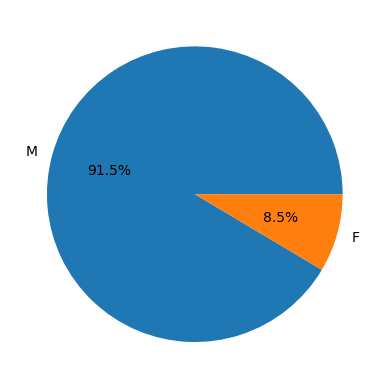

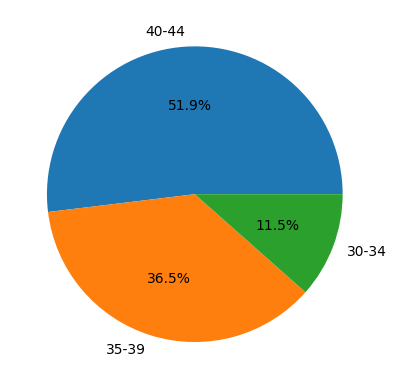

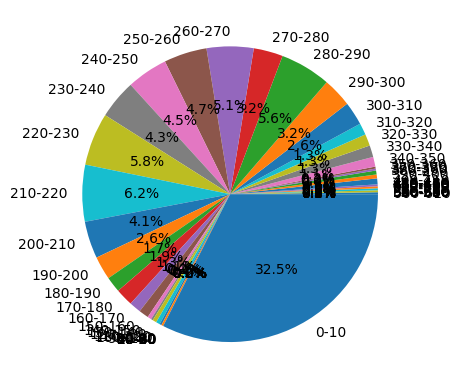

In [52]:
w=Wtv()
w.from_file('myheart.csv')
print("Ex3")
ex3(w).plot()
print("Ex4")
ex4(w).plot()
print("Ex5")
ex5(w).plot()